# 디리클레 프로세스

참고: https://assaeunji.github.io/bayesian/2019-01-06-dp/

- 이해를 제대로 하지 못한 것 같아서, 다시 한 번 블로그 글을 정독하고 다시 코드화를 시켜보았다.


- 디리클레 프로세스를 통해서 우리는 무한대를 r개의 partition으로 나누고, 이들에 대한 이산형 확률질량함수를 얻는 것으로 일단 이해했다.


- 그러나 아직도 이 얘기가 와닿지는 않는다.


- 무엇보다 디렉델타함수가 어떻게 사용되는지 아직 잘 모르겠어서 코드 구현이 시급하다고 판단했다.


- 제발 이해하길..

In [64]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as ss
import seaborn as sns
from statsmodels.datasets import get_rdataset
from theano import tensor as T

In [75]:
np.random.seed(433)
N = 20 
K = 30 # n_sticks like pi_1 ~ pi_30
alpha = 100.
H = ss.norm
beta = ss.beta.rvs(1,alpha, size = (N,K))

In [83]:
pi = np.empty_like(beta)
pi[:, 0] = beta[:, 0]
pi[:, 1:] = beta[:, 1:] * (1-beta[:, :-1]).cumprod(axis=1)
pi = (1 - beta[:, :]).cumprod(axis = 1) / (1 - beta[:, :]) * beta

omega = H.rvs(size = (N,K)) # 

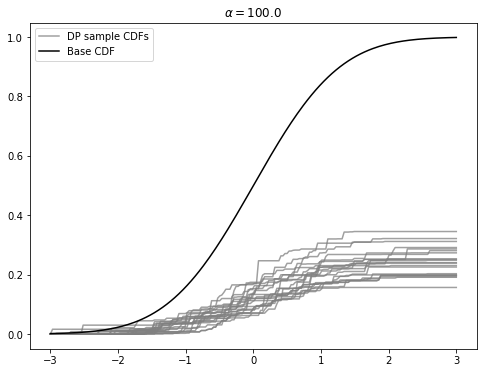

In [84]:
x_plot = np.linspace(-3,3,200)            
sample_cdfs = (pi[..., np.newaxis]* np.less.outer(omega, x_plot)).sum(axis=1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot (x_plot, sample_cdfs[0],c="gray", alpha=0.75, label = "DP sample CDFs")
ax.plot(x_plot, sample_cdfs[:].T, c="gray", alpha=0.75) #.T: transpose (20,200) => (200,20)
ax.plot(x_plot, H.cdf(x_plot), c= "k", label = "Base CDF")

ax.set_title(r'$\alpha = {}$'.format(alpha))
ax.legend(loc=2)

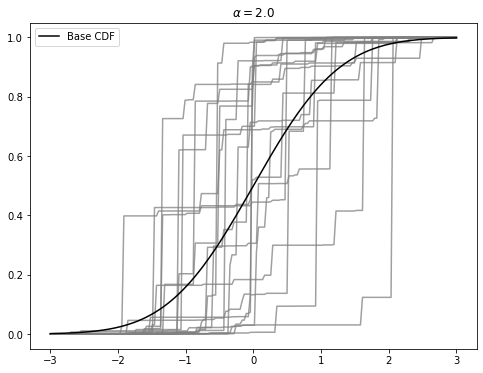

In [67]:
x_plot = np.linspace(-3,3,200)            
sample_cdfs = (pi[..., np.newaxis]* np.less.outer(omega, x_plot)).sum(axis=1)

fig, ax = plt.subplots(figsize=(8,6))

#ax.plot (x_plot, sample_cdfs[0],c="gray", alpha=0.75, label = "DP sample CDFs")
ax.plot(x_plot, sample_cdfs[:].T, c="gray", alpha=0.75) #.T: transpose (20,200) => (200,20)
ax.plot(x_plot, H.cdf(x_plot), c= "k", label = "Base CDF")

ax.set_title(r'$\alpha = {}$'.format(alpha))
ax.legend(loc=2)

In [68]:
omega[0,:]

array([ 0.88982387, -1.92193726, -0.43842638, -1.96201827, -0.51111421,
       -0.77538753,  2.31568585,  0.23097975, -1.41214508,  1.02635801,
        0.12557162,  1.09258383,  0.30054142, -0.23491113, -0.40492805,
       -0.26949156, -2.16262222,  0.98266844, -1.39607865,  0.37653102,
       -0.63511732,  1.52155126,  0.26013199,  3.24439437,  0.36082548,
       -0.4576086 , -0.96024753,  1.29996887, -1.02880888, -1.36298478])

In [69]:
print(np.less.outer(omega,[-1,2]).shape)
np.less.outer(omega,[-1,2])[0]

(20, 30, 2)


array([[False,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [False, False],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True]])

In [70]:
x_plot = np.linspace(-3,3,200)
t = np.less.outer(omega, x_plot) # omega의 한값이 X_plot(200개)값 보다 작은가? True or False
t

array([[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  Tr

In [71]:
(pi[..., np.newaxis] * t)

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.83051375e-01, 2.83051375e-01, 2.83051375e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.71548532e-01, 3.71548532e-01, 3.71548532e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.78113604e-02, 6.78113604e-02, 6.78113604e-02],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.11038447e-09, 1.11038447e-09, 1.11038447e-09],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.75625964e-08, 5.75625964e-08, 5.75625964e-08],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.88786772e-08, 1.88786772e-08, 1.88786772e-08]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.39180937e-01, 1.39180937e-01, 1.39180937e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.64294392e-01, 1.64294392e-01, 1.64294392e-01],
        [0.00000000e+00, 

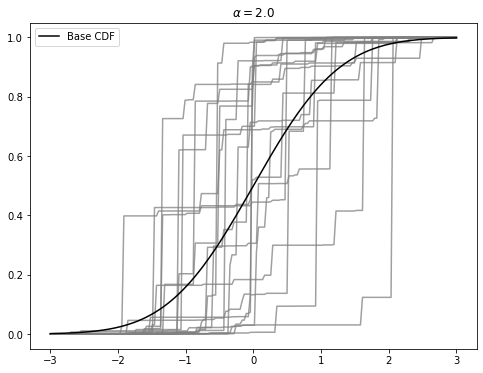

In [72]:
x_plot = np.linspace(-3,3,200)            
sample_cdfs = (pi[..., np.newaxis]* np.less.outer(omega, x_plot)).sum(axis=1)

fig, ax = plt.subplots(figsize=(8,6))

#ax.plot (x_plot, sample_cdfs[0],c="gray", alpha=0.75, label = "DP sample CDFs")
ax.plot(x_plot, sample_cdfs[:].T, c="gray", alpha=0.75) #.T: transpose (20,200) => (200,20)
ax.plot(x_plot, H.cdf(x_plot), c= "k", label = "Base CDF")

ax.set_title(r'$\alpha = {}$'.format(alpha))
ax.legend(loc=2)